# The Robbins Lab
### APPLYING QUANTITATIVE GENETICS, GENOMICS, AND COMPUTATIONAL SCIENCE TO IMPROVE THE EFFICIENCY OF CROP BREEDING PROGRAMS AND INCREASE UNDERSTANDING OF COMPLEX TRAITS.


![](images/RobbinsLab.png) 


# Definitions
## **Genome** – the complete sequence of nucleotides of an individual’s DNA
## **Gene** – A gene is a DNA sequence with some functional purpose. A transcriptional unit including promoter, introns, exons, and transcription terminator.
## **Locus** – The location of a specific gene in the genome.
## **Allele** – Variants of the same gene at the same locus.
## **Marker** – A genotyped polymorphism that is used to track differences in the genomes of individuals


# Inheritance

![](images/Meiosis.png)

# 1.  **Law of segregation**: A trait is influenced by a pair of alleles but each individual passes on to       its progeny a gamete that contains only a single, random, allele.

# 2.  **Law of independent assortment**: Alleles of different factors combine independently in the gamete.


# **What is probability?**


-  ### Measure of how likely an event is to occur 
- ### A quantification of uncertainty 
- ### $\frac{outcome}{all-outcomes}$




![](images/coin.jpg)

---
# Probability Rules

- ### Probability of A occurring $P(A)$
- ### Probability of B occurring $P(B)$
- ### Probability of A occurring given B $P(A|B)$
- ### Probability of A **AND** B occurring $P(A \cap B)$
- ### Probability of A **OR** B occurring $P(A \cup B)$

# Probability Rules

- ### **Dependence:**
 + ### Does the outcome of one event influence another?



![](images/independent.png)

![](images/dependent.png)

---

- ### Conditional probability of A **given** B has occurred
 + ### $P(A|B) = \frac{P(B \cap A)}{P(B)}$
- ### If  $P(A|B) = P(A)$ we can say A is independent of B


---

- ### Probability of A **AND** B occurring
 + ### $P(A \cap B) = P(A)P(B|A)$
- ### Probability of A **OR** B occurring
 + ### $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

## When A and B are independent:

- ### Probability of A **AND** B occurring
 + ### $P(A \cap B) = P(A)P(B)$
- ### Probability of A **OR** B occurring
 + ### $P(A \cup B) = P(A) + P(B)$

____

# Single Locus inheritance for two heterozygouse parents
## Probability of each genotype in the offspring 
## $P(A_{p1} \cap A_{p2}) = P(A_{p1})*P(A_{p2}) = .5 * .5 = .25$ 
## $P(A_{p1} \cap a_{p2}) = P(A_{p1})*P(a_{p2}) = .5 * .5 = .25$
## $P(a_{p1} \cap A_{p2}) = P(a_{p1})*P(A_{p2}) = .5 * .5 = .25$
## $P(a_{p1} \cap a_{p2}) = P(a_{p1})*P(a_{p2}) = .5 * .5 = .25$

_____

## Punnett Square

![](images/Punnett.png)

## Probability that the offspring is heterozygous = $P(A_{p1}a_{p2} \cup a_{p1}A_{p2}) = .25 + .25 = .5$
## Probability that the offspring is homozygous = $P(A_{p1}A_{p2} \cup a_{p1}a_{p2}) = .25 + .25 = .5$

_____

# Gene Action

## Additive
![](images/additive.png)

## Dominance
![](images/dominance.png)

## **Epistasis** - Interaction between loci. The multi-locus genetic effect is not equal to the sum of the effects at each locus.

## **Pleiotropy** – When a single gene effects more than one trait.

## **Polygenetic trait** – A trait controlled by more than one gene.


# Central Limit
- ### CLT states the sum of a large number of independent identically distributed random variables with a finite variance will be approximately normal.


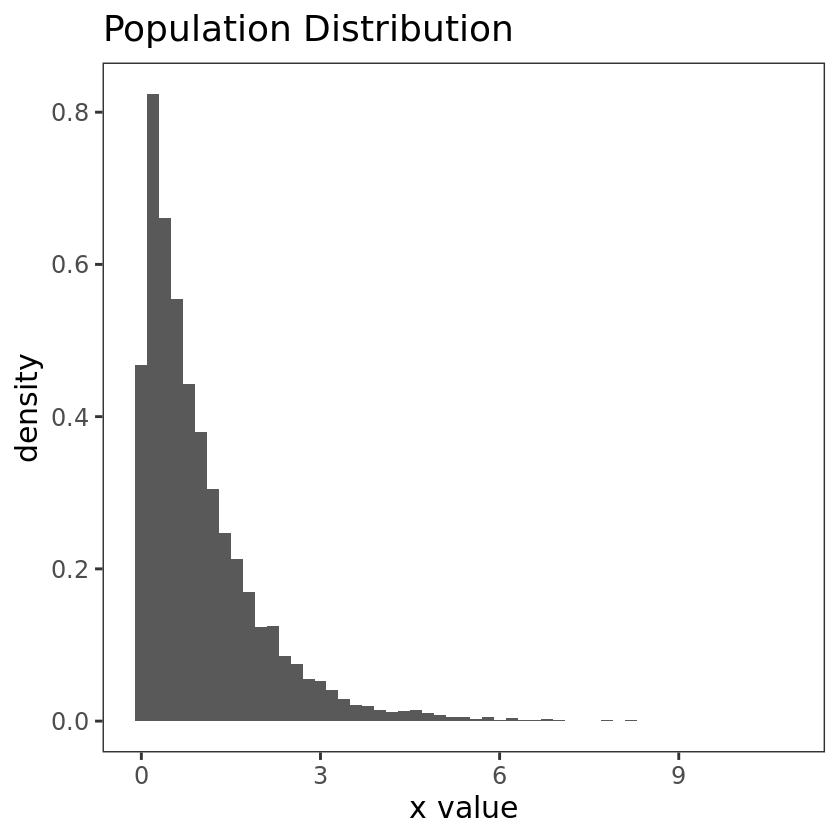

In [2]:
# Central Limit Demo
library(ggplot2)
set.seed(100)
dat = rexp(10000)
ggplot(data.frame(x=dat), aes(x=x)) +
  geom_histogram(aes(y = ..density..), binwidth=.2 ) + xlab("x value") +
  ggtitle("Population Distribution") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank())

# Central limit theorom

- ### CLT states the sum of a large number of independent identically distributed random variables with a finite variance will be approximately normal.


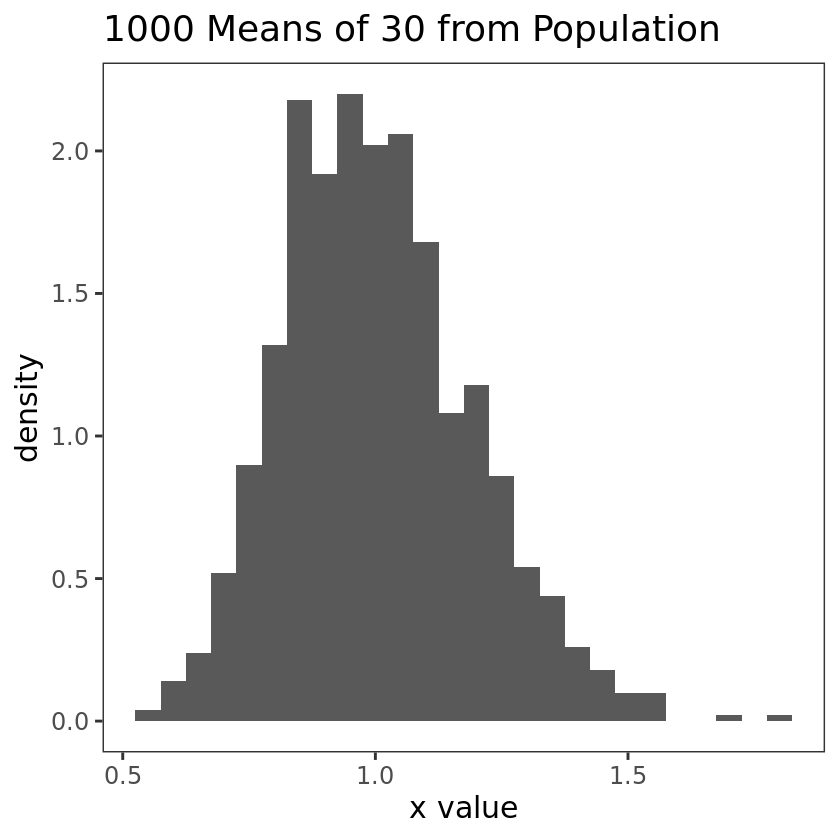

In [2]:
set.seed(100)
samples <- c()
for(i in 1:1000){
  samples <- c(samples, mean(sample(dat, 30)))
}
ggplot(data.frame(x=samples), aes(x=x)) +
  geom_histogram(aes(y = ..density..), binwidth=.05 ) + xlab("x value") +
  ggtitle("1000 Means of 30 from Population") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank())

# How many genes need to controll a trait before the genetic effects follow a normal distribution?

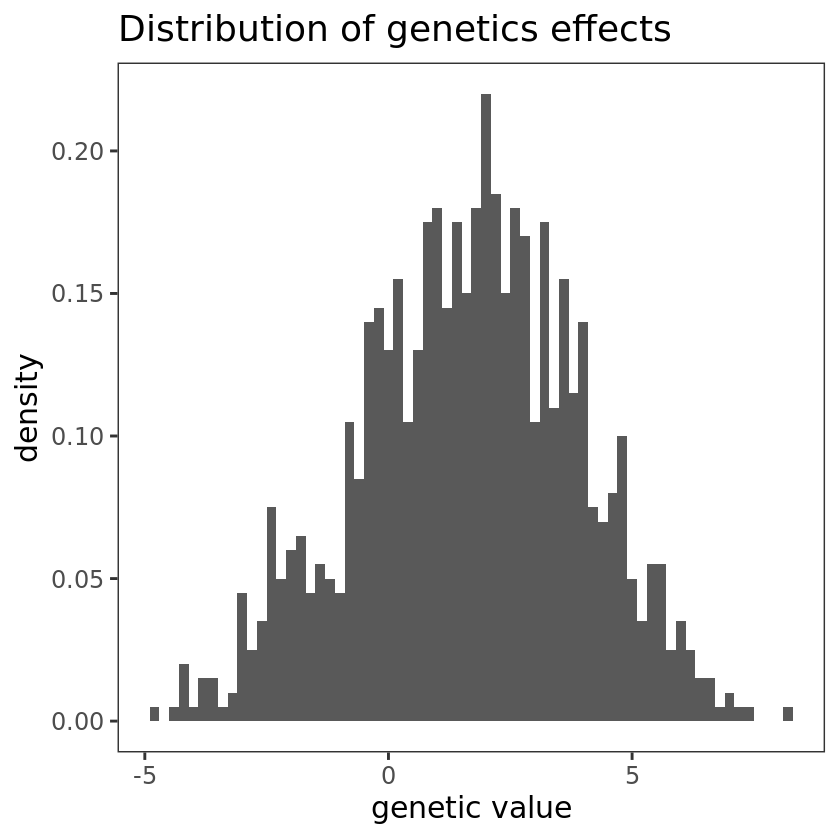

In [5]:
# number of quantitative trait loci controlling the trait of interest
nQTL=10

# allocating a vector to store the some of QTL effects for 1000 lines
gEffects=rep(0,1000)

# simulating QTL effects using a uniform distribution (0,1)
QTLeffect=runif(nQTL)

# Sampling bi-allelic polymorphisms for 10000 lines
# Assuming a high minor allele frequency of .4
# setting up a loop to sample genotypes 
for(i in c(1:1000)){
    for(j in c(1:nQTL)){
        # sample first allele at the jth locus
        if(runif(1)>.4){
            #adding allele effect for the ith line
            gEffects[i]=gEffects[i]+QTLeffect[j]
        } else {
            gEffects[i]=gEffects[i]-QTLeffect[j]
        }
            
        # sample second allele a jth locus
        if(runif(1)>.4){
            #adding allele effect for the ith line
            gEffects[i]=gEffects[i]+QTLeffect[j]
        } else {
            gEffects[i]=gEffects[i]-QTLeffect[j]
        }
    }
}

ggplot(data.frame(x=gEffects), aes(x=x)) +
  geom_histogram(aes(y = ..density..), binwidth=.2 ) + xlab("genetic value") +
  ggtitle("Distribution of genetics effects") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank())

# Partitioning genetic variance
## We can define the relationship between the phenotypes we observe and the genetic merit that we want to estimate:

## 𝑃 (phenotype)   =   𝐺 (genetic)   +   𝐸 (environment)

## Assuming there is no covariance between genetic merit and environment:
## $𝑉(𝑃) = 𝑉(𝐺) + 𝑉(𝐸)$ 
## And
## $𝐶𝑜𝑣(𝑃,𝐺) = 𝐶𝑜𝑣(𝐺+𝐸,𝐺) = 𝐶𝑜𝑣(𝐺,𝐺) + 𝐶𝑜𝑣(𝐺,𝐸) = 𝑉(𝐺)$

# Regression
## Consider the following linear predictor of y given x:
  
## $ \hat{𝑦_{i}}=\bar{𝑦} +𝑏_{(𝑦|𝑥)} (𝑥_{i} − \bar{𝑥})$
 
## In the above equation the slope that is used to predict $y$ based on observed values of $x$ is a function of the covariance between $x$ and $y$:
 
## $ 𝑏_{(𝑦|𝑥)}=\frac{𝐶𝑜𝑣(𝑥,𝑦)}{𝑉(𝑥)}$

# Heritability

## Given the phenotype is what we know, and the genetic merit is what we want to select on, we can use the covariance between the phenotype and genetic merit to predict genetic merit and make sections.
 
## $𝑏_{(𝐺|𝑃)}=\frac{𝑉(𝐺)}{(𝑉(𝐺)+𝑉(𝐸)}$
 
## In breeding $𝑏_{(𝐺|𝑃)}$ is referred to as the broad sense heritability ($H^2$)

# Partitioning of genetic variance

## $\sigma_{𝐺}^2=\sigma_{𝐴}^2+\sigma_{𝐷}^2+\sigma_{𝐴𝐴}^2$

## $\sigma_{P}^2=\sigma_{𝐴}^2+\sigma_{𝐷}^2+\sigma_{𝐴𝐴}^2+\sigma_{E}^2$

### $𝐶𝑜𝑣(𝑃,𝐴)=𝐶𝑜𝑣(𝐴+𝐸,𝐴)=𝐶𝑜𝑣(𝐴,𝐴)+𝐶𝑜𝑣(𝐴,𝐸)=𝑉(𝐴)= \sigma_{𝐴}^2$

## $𝑏_{(𝐴|𝑃)}=\frac{\sigma_{𝐴}^2}{\sigma_{𝑃}^2}$

## In breeding $𝑏_{(𝐴|𝑃)}$ is referred to as the narrow sense heritability ($h^2$)




# Response to selection
## $𝑅=𝑏_{(𝐴|𝑃)}∗𝑆$

## $𝑅=ℎ^2*𝑆$

![](images/selection_differential.png)

# Breeder's Equation 
## $R=i*h^2*\sigma_{P}$

## $R=i*h*\sigma_{a}$

## $R_{year}=\frac{i*r*\sigma_{a}}{L}$


# Breeding Schemes

![](images/BreedingScheme.png)
 

## Optimization

### Let's look at 3 possible breeding schemes to determine which one is most effective. Each scenario uses the same amount of reasources but respresent trade-offs between selection intensity, selection accuracy, and generation interval.

### **Scenario 1**: The best 10 lines are advanced after 1 year of testing. A total of 50 lines are tested each year with 4 plots per line. (selection intensity = 1.399)

### **Scenario 2** The best 10 lines are advanced after 1 year of testing. A total of 200 lines are tested each year with one plot per line.(selection intensity = 2.0627)


### **Scenario 3** The best 10 lines are advanced after 2 years of testing. A total of 100 lines are tested in two years with 2 plots per line in each year. (selection intensity = 1.755)

### ***Which scenario is best when dealing with a trait that has $h^{2}=0.25$?***

In [9]:
# Simple example illustrating some trade offs.
#input paramters
h2_plot=.75
# assuming phenotypic variance is 1
gVar=h2_plot*1
nLines=200
nReps=1
nYears=1
accuracy=(h2_plot/(h2_plot+((1-h2_plot)/nReps*nYears)))**.5
selection_intensity=2.0627

# Genetic Gain Per Year (assuming it takes 2 years to develop new lines for testing and phenotypic variance =1)
R=selection_intensity*accuracy*gVar**.5/(2+nYears)
print(R)

#S1_.25 = .176
#S2_.25 = .172
#S3_.25 = .111

#S1_.75 = .388
#S2_.75 = .51


[1] 0.515675


## ***How do you think the results would change if the trait of interest had $h^{2}=0.75$?***

# Genetic models
### In the previous example we used an accuracy calculated as: 

## $acc=\sqrt{\frac{\sigma_{a}^2}{\sigma_{a}^2+\frac{\sigma_{e}^2}{n_{rep}*n_{years}}}}$

### This is the case when mean perofrmance is used as the selection criterion.
### Given our understanding of inheritance we can fit more accurate models by ustilizing information on genetic relationships.

## Genetic Relationships: Identity by Descent
### The genetic (co)variance between individuals for a given phenotype is determined by common alleles for the QTL that explain variance for the phenotype

### In the absence of detailed information on the QTL, the (co)variance can be approximated by calculating the probability two individuals carry alleles that are identical by descent (IBD).
### - IBD represents the probability that the same allele is inherited by two individuals from some common ancestor.
### - These calculations can be done using pedigrees or genotypes


## A simple illustration
### In this exmple we are testing lines from 2 unrelated full sib families. The code below will simulate a polygenetic trait and compare prediction accuracy using a model that ignores genetic relationships and a mixed model that accounts for the relationships.


## Setting the heritability of the trait and loading packages

In [14]:
library(MASS)
set.seed(35783948)
#setting variety and residual variance
VarV=25
VarE=75

## Generating the relationship matrix

[1] "A matrix"


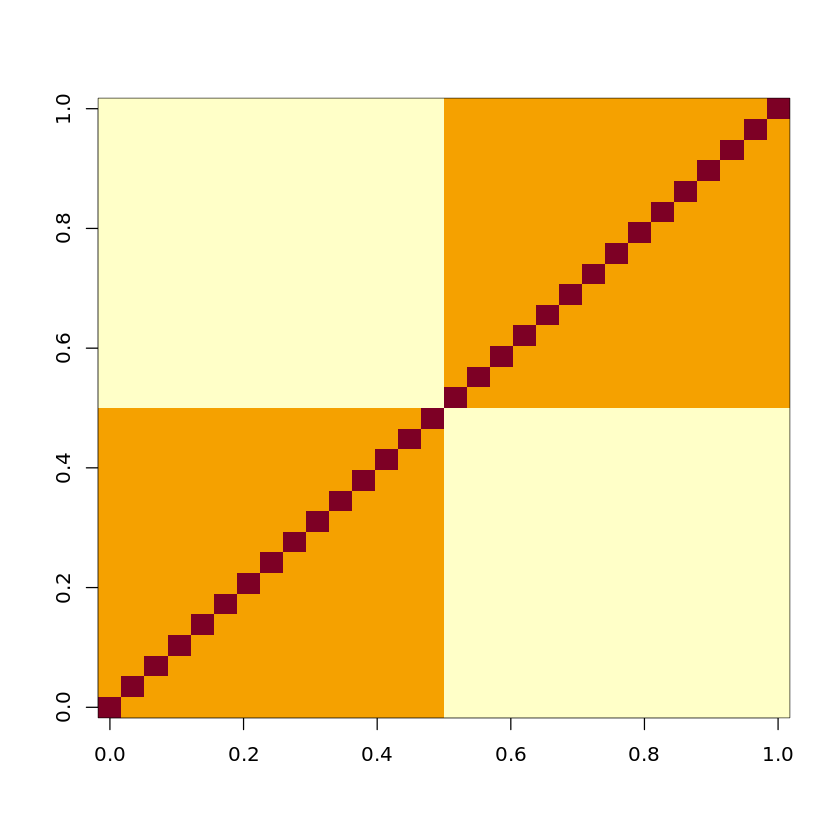

In [6]:
# this is the expected relationship matrix for to unrelated full-sib families
# there is a total of 30 lines, 15 lines in each family
#initializing a 30 x 30 matrix with all values = 0
A=matrix(0,30,30)
#creating a block of .5 for family 1
A[1:15,1:15]=.5
#creating a block of .5 for family 2
A[16:30,16:30]=.5
#setting the diagonal to 1
diag(A)<-1
print("A matrix")
image(A)

## Setting up the equations

### For LSM the equations are:

LHS = $$X_{f}'X_{f}$$ and RHS = $$X_{f}'y$$

### When including a relationship matrix the mixed model equations are:

LHS = 
$$\begin{bmatrix}
X'X&X'Z \\
Z'X&Z'Z+\alpha A^{-1} \\
\end{bmatrix}$$

and RHS = 
$$\begin{bmatrix}
X'y \\
Z'y \\
\end{bmatrix}$$

## Simulating data and solving

In [15]:
#setting block effects
blockEffects=c(100,140,75)
#setting a vector with the mean of the 2 families
meanFam=c(rep(5,15),rep(-5,15))
#family 1 will be simulated as being 6 units better than family 2
# sampling 30 variety effects
# now we are sampling from mvnorm since the variety effects are no longer iid
varietyEffects=MASS::mvrnorm(1,meanFam,VarV*A)
#setting up full incidence matrix to simulate y
Xf=matrix(0,90,33)
#loop to form full incidence matrix (Xf)
Xf[1:30,1]=1
Xf[31:60,2]=1
Xf[61:90,3]=1
for(i in c(1:30)){
  Xf[i,(i+3)]=1
  Xf[i+30,(i+3)]=1
  Xf[i+60,(i+3)]=1
}
# generate y values - the variance for varieties = 1 and the residual variance = 4
y=Xf[,1:3]%*%blockEffects+Xf[,4:33]%*%varietyEffects+rnorm(90,0,VarE**.5)

# setting up incidence matrices
X=matrix(0,90,32)
#Add an overall mean and remove one level of the block effects
X[,1]=1
X[31:60,2]=1
X[61:90,3]=1

# set up X and Z matrix columns associate with the variety effect
Z=Xf[,4:33]

#for fixed effects we need to remove 1 level of the variety effect
X[,4:32]=Xf[,5:33]

# setting up LHS and RHS for OLS
LHS_OLS=t(X)%*%X
RHS_OLS=t(X)%*%y

# setting up LHS and RHS for mixed models
LHS_MM=matrix(0,33,33)
#calculating alpha (residual variance/random effect variance)
alpha=VarE/VarV
LHS_MM[1:3,1:3] = t(X[,1:3])%*%X[,1:3]
LHS_MM[1:3,4:33] = t(X[,1:3])%*%Z
LHS_MM[4:33,1:3] = t(Z)%*%X[,1:3]
#modifying to use the inverse of the A matrix
LHS_MM[4:33,4:33] = t(Z)%*%Z + alpha*solve(A)
# note that alpha is generally unknown (unless you simulated the data) so mixed model software has to estimate alpha
RHS_MM=matrix(0,33,1)
RHS_MM[1:3,1]=t(X[,1:3])%*%y
RHS_MM[4:33,1]=t(Z)%*%y

#solving for OLS and MM
sol_OLS=solve(LHS_OLS)%*%RHS_OLS
sol_MM=solve(LHS_MM)%*%RHS_MM

# Plot OLS vs MM solutions
OLS=rep(0,30)
#Adding mean to OLS solutions for variety
OLS[2:30]=rep(sol_OLS[1],29)+sol_OLS[4:32]
OLS[1]=sol_OLS[1]

#Adding mean to OLS solutions for variety
MM=rep(sol_MM[1],30)+sol_MM[4:33]


## Results

[1] "Correlation of OLS and MM solutions"
[1] 0.9068765
[1] "Correlation of OLS and Simulated Genetic Effects"
[1] 0.8137119
[1] "Correlation of MM and and Simulated Genetic Effects"
[1] 0.8702997


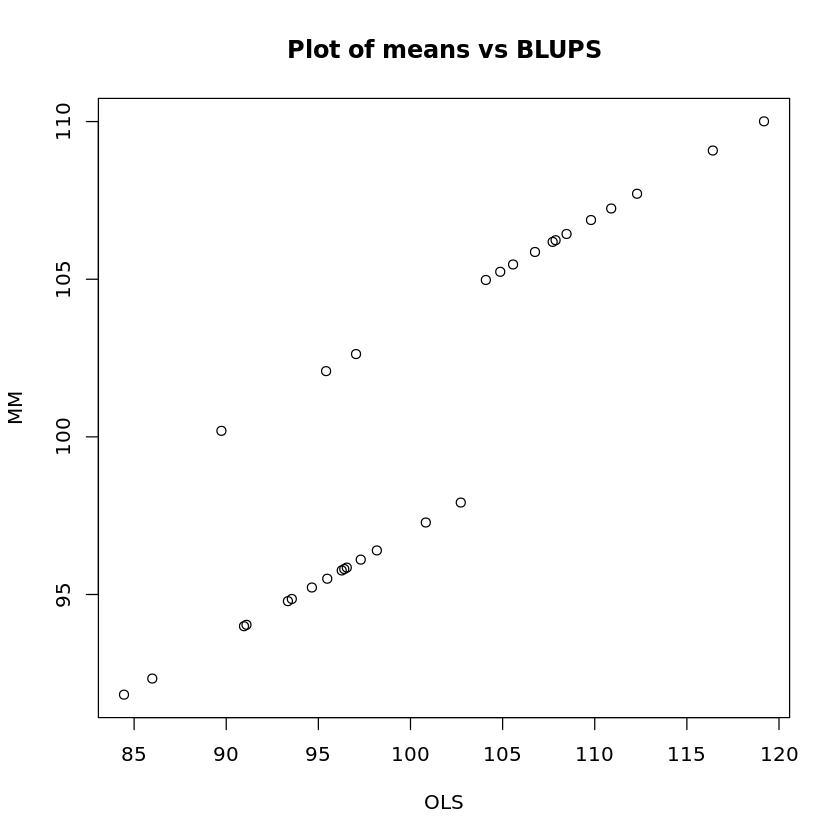

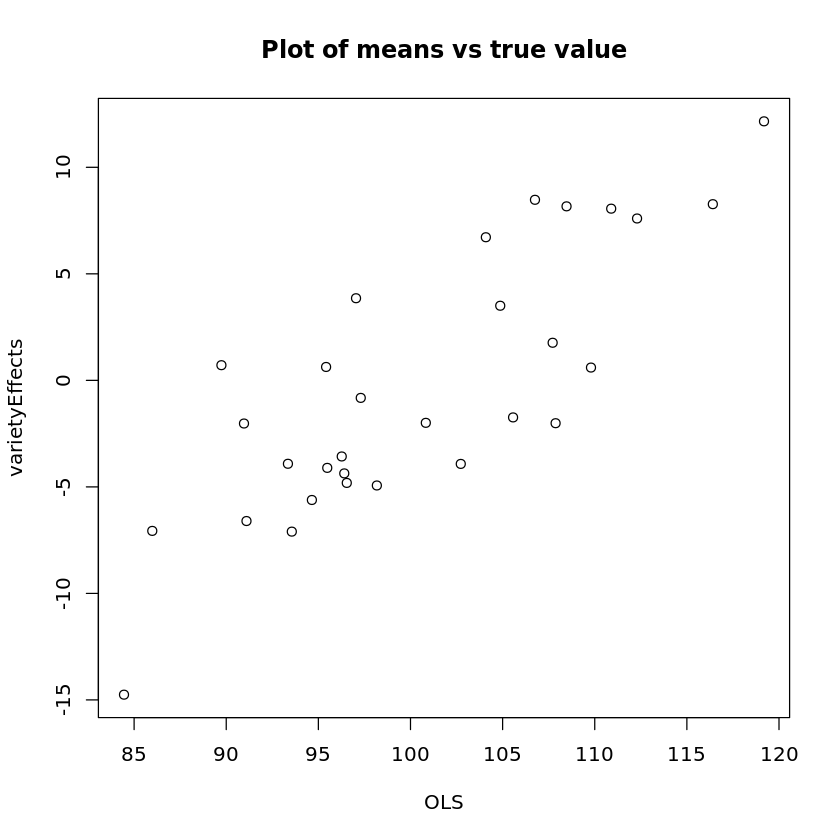

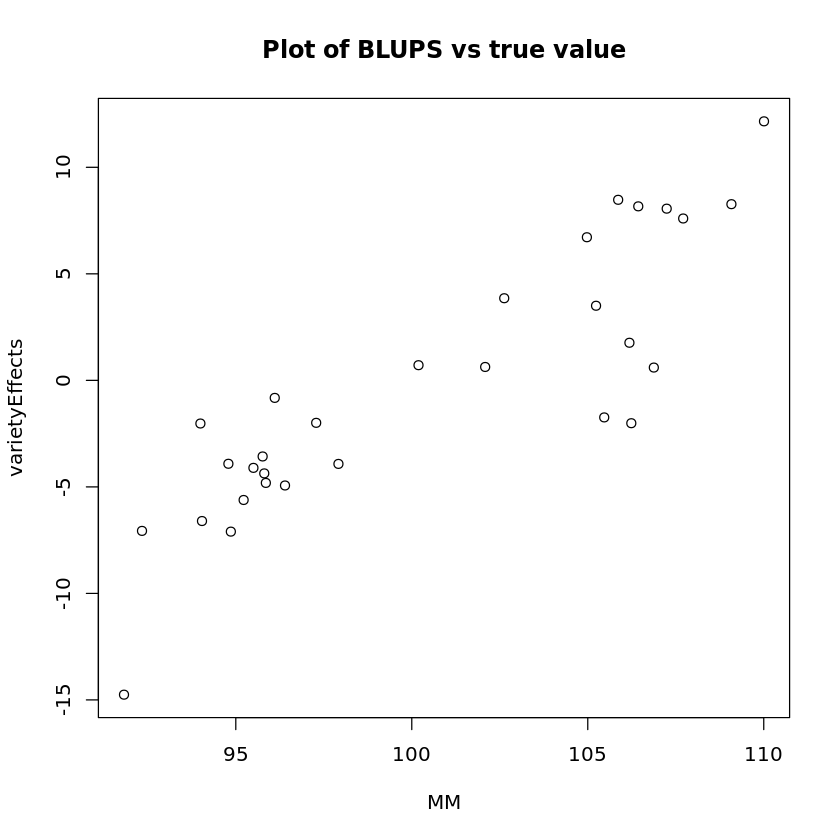

In [16]:
print("Correlation of OLS and MM solutions")
print(cor(OLS,MM))

print("Correlation of OLS and Simulated Genetic Effects")
print(cor(OLS,varietyEffects))

print("Correlation of MM and and Simulated Genetic Effects")
print(cor(varietyEffects,MM))

plot(OLS,MM, main="Plot of means vs BLUPS")
plot(OLS,varietyEffects,main="Plot of means vs true value")
plot(MM,varietyEffects,main="Plot of BLUPS vs true value")

## ***How might the heritability of a trait impact the benefit of including genetic relationships?*** 

# Revisiting the breeding scheme
## Using the 3 breeding scheme scenarios, repeat the exercise using code below.
## The only difference is that we are now assuming we have a more accurate model that reduces the error in our estimates by 25%.
## ***Does the change in model accuracy impact which design is best?***

In [12]:
# Simple example illustrating some trade offs.
#input paramters
h2_plot=.25
# assuming phenotypic variance is 1
gVar=h2_plot*1
nLines=100
nReps=2
nYears=2
# Calculating accuracy assuming the advanced model reduces error by 25%
accuracy=(h2_plot/(h2_plot+((1-h2_plot)/nReps*nYears)*.75))**.5
selection_intensity=1.755

# Genetic Gain Per Year (assuming it takes 2 years to develop new lines for testing and phenotypic variance =1)
R=selection_intensity*accuracy*gVar**.5/(2+nYears)
print(R)

[1] 0.1216874


# Predictive Breeding
![](images/predictive_breeding.png)